In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('data1.csv')
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


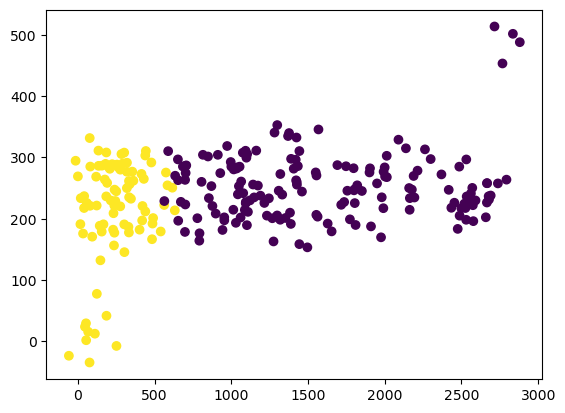

In [3]:
X = df[['x','y']].values
y = df.z == 'a'
plt.scatter(X[:,0], X[:, 1], c=y)

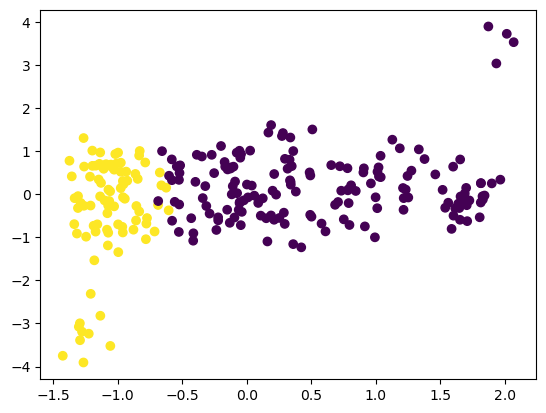

In [10]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:, 1], c=y)

(array([ 98., 239., 160., 117.,  75.,  66.,  68.,  37.,  33.,  20.,  23.,
         25.,  12.,   9.,   6.,   2.,   4.,   0.,   2.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.96239966,  0.76445456,  3.49130879,  6.21816302,  8.94501725,
        11.67187147, 14.3987257 , 17.12557993, 19.85243416, 22.57928838,
        25.30614261, 28.03299684, 30.75985107, 33.4867053 , 36.21355952,
        38.94041375, 41.66726798, 44.39412221, 47.12097643, 49.84783066,
        52.57468489, 55.30153912, 58.02839334, 60.75524757, 63.4821018 ,
        66.20895603, 68.93581025, 71.66266448, 74.38951871, 77.11637294,
        79.84322716]),
 <BarContainer object of 30 artists>)

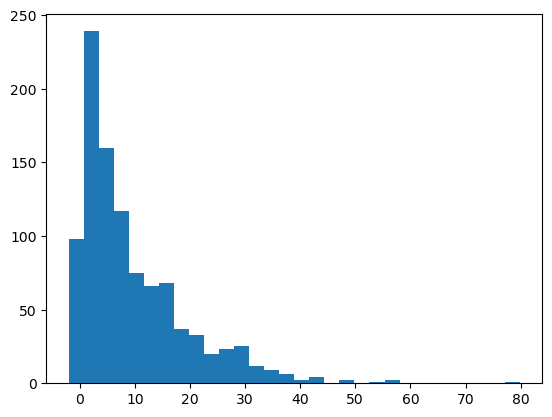

In [7]:
r = np.random.exponential(10, (1000)) + np.random.normal(0,1,(1000))
plt.hist(r, 30)

(array([ 98., 239., 160., 117.,  75.,  66.,  68.,  37.,  33.,  20.,  23.,
         25.,  12.,   9.,   6.,   2.,   4.,   0.,   2.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.17914007, -0.90017894, -0.62121781, -0.34225668, -0.06329555,
         0.21566558,  0.49462671,  0.77358784,  1.05254897,  1.3315101 ,
         1.61047123,  1.88943236,  2.16839349,  2.44735462,  2.72631575,
         3.00527688,  3.28423801,  3.56319914,  3.84216027,  4.1211214 ,
         4.40008253,  4.67904366,  4.95800479,  5.23696592,  5.51592705,
         5.79488818,  6.07384931,  6.35281044,  6.63177157,  6.9107327 ,
         7.18969383]),
 <BarContainer object of 30 artists>)

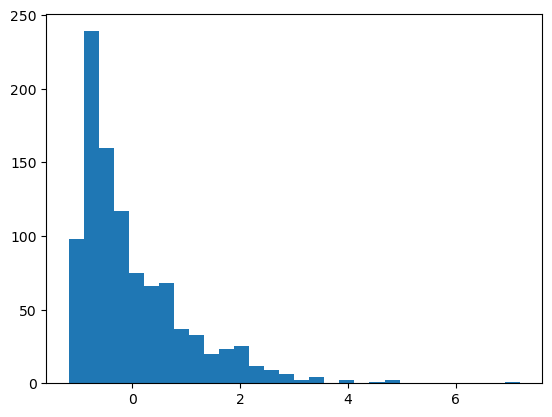

In [9]:
plt.hist((r - np.mean(r)) / np.std(r), 30)

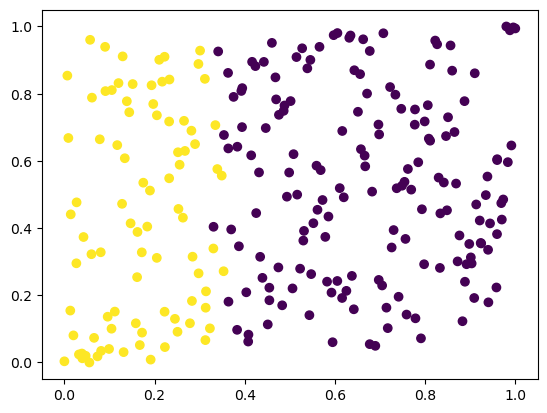

In [12]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0], X_new[:, 1], c=y)

In [28]:
def get_plot(scaler):
    pipe = Pipeline([
        ('scale', scaler),
        ('model', KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])
    pred = pipe.fit(X,y).predict(X)
    
    plt.figure(figsize=(9,3))
    
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('Original Data')
    
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title('Transformed Data')
    
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title('Predicted Data')

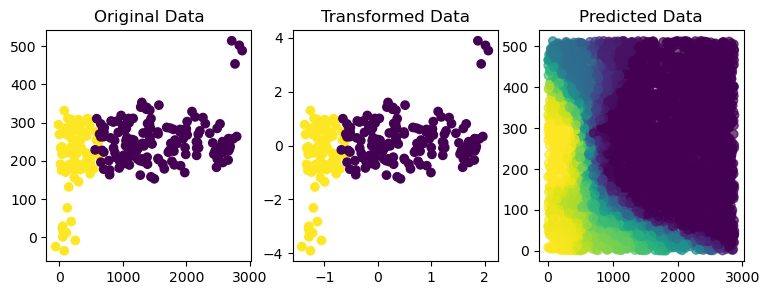

In [29]:
get_plot(scaler=StandardScaler())

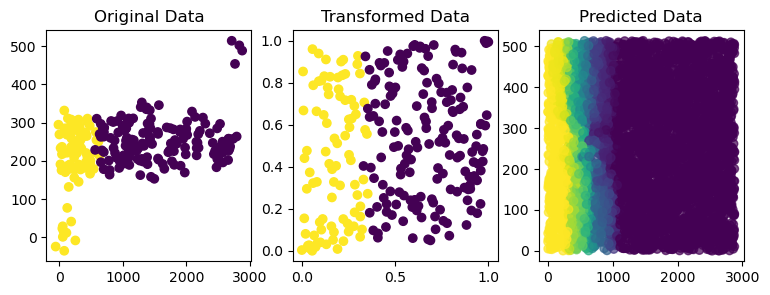

In [30]:
get_plot(scaler=QuantileTransformer(n_quantiles=100))

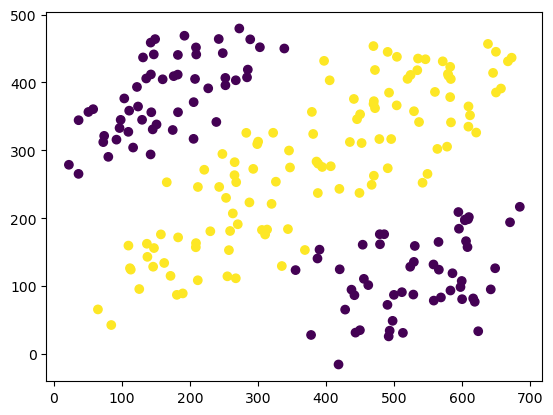

In [31]:
df = pd.read_csv('data2.csv')
X = df[['x','y']].values
y = df.z == 'a'
plt.scatter(X[:, 0], X[: ,1], c=y)

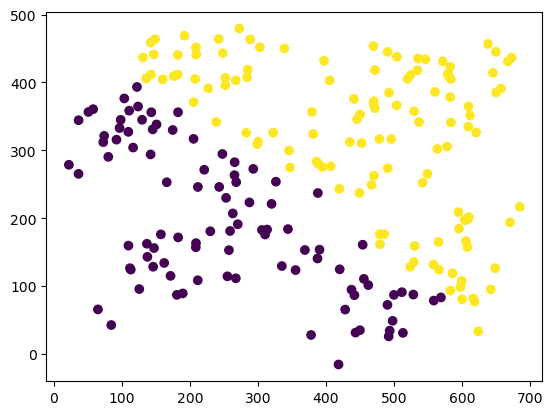

In [32]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:,0], X[:,1], c=pred)

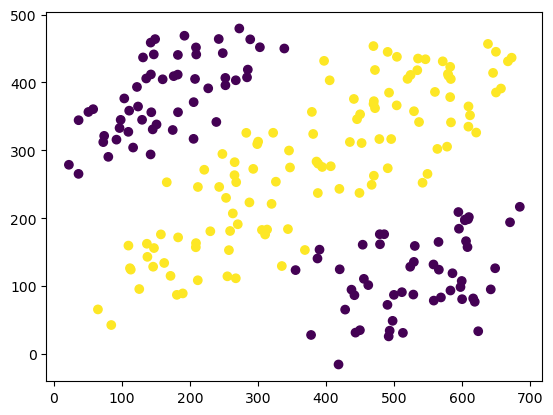

In [33]:
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:,0], X[:,1], c=pred)

In [40]:
arr = np.array(['low', 'low', 'high', 'medium']).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [41]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [42]:
enc.transform([['zero']])

array([[0., 0., 0.]])